# SURF 

In [1]:
import cv2
import matplotlib.pyplot as plt
import drawMatches

img = cv2.imread('house.png',0)

surf = cv2.SURF(10000)
kp, des = surf.detectAndCompute(img,None)

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
cv2.imwrite('surf_keypoints.jpg',img2)

True

In [21]:
from matplotlib.pyplot import imshow
%matplotlib inline

32 73


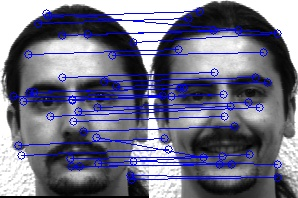

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import drawMatches as dm
import extract_descriptors as ed

path1='subject9/subject09.normal.png'
path2='subject9/subject09.happy.png'
# find the keypoints and descriptors with SIFT
kp1, des1 = ed.extract_surf(path1, hessian=500, octave=2, octaveLayers=2, ext=False)
kp2, des2 = ed.extract_surf(path2, hessian=500, octave=2, octaveLayers=2, ext=False)

good=ed.matcher(kp1, kp2, des1, des2)

img3 = dm.drawMatches(cv2.imread(path1,0),kp1,cv2.imread(path2,0),kp2,good)

cv2.imwrite('match.jpg',img3)
print len(good), len(des1)

from IPython.display import Image
Image(filename='match.jpg') 

In [ ]:
import pickle
dataset = pickle.load(open("../output/LabeledData.obj", "rb"))


In [ ]:
def create_database(dataset, method="sift"):
    """
    Creates a database of features and appended labels for all images in dataset
    """
    X=[]
    Y=[]
    for img in dataset:
        if method=="sift":
            kp,des=extract_sift_features(img[0])
        if method=="surf":
            kp,des=extract_surf_features(img[0])
        for d in des:
            X.append(d)
            Y.append(img[1])
        del des
    del img
    return X,Y

In [ ]:
X, Y= create_database(dataset)